In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [8]:
url = 'https://www.kaggle.com/datasets/shashanknecrothapa/ames-housing-dataset/download'
Ameshousing = pd.read_csv('AmesHousing.csv')

# Explore the dataset
print(Ameshousing.info())  # View data types and missing values
print(Ameshousing.describe())  # Summary statistics

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

In [11]:
#how much data is missing and the perc
null_stats = pd.DataFrame(Ameshousing.isnull().sum(), columns=['missing_value_count'])
null_stats.loc[:,'% of dataset'] = np.round(null_stats.loc[:,'missing_value_count'] / Ameshousing.shape[0] * 100, 2)
null_stats.loc[null_stats.loc[:,'missing_value_count']>0,:].sort_values(by='missing_value_count', ascending=False)

,missing_value_count,% of dataset
Pool QC,2917,99.56
Misc Feature,2824,96.38
Alley,2732,93.24
Fence,2358,80.48
Fireplace Qu,1422,48.53
Lot Frontage,490,16.72
Garage Cond,159,5.43
Garage Qual,159,5.43
Garage Finish,159,5.43
Garage Yr Blt,159,5.43


In [12]:
# Drop columns with more than 50% missing values
threshold = 0.5 * len(Ameshousing)
Ameshousing = Ameshousing.dropna(axis=1, thresh=threshold)
print(Ameshousing.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 78 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Lot Shape        2930 non-null   object 
 8   Land Contour     2930 non-null   object 
 9   Utilities        2930 non-null   object 
 10  Lot Config       2930 non-null   object 
 11  Land Slope       2930 non-null   object 
 12  Neighborhood     2930 non-null   object 
 13  Condition 1      2930 non-null   object 
 14  Condition 2      2930 non-null   object 
 15  Bldg Type        2930 non-null   object 
 16  House Style      2930 non-null   object 
 17  Overall Qual  

In [13]:
#for float and int
numeric_cols = Ameshousing.select_dtypes(include=['number']).columns
Ameshousing[numeric_cols] = Ameshousing[numeric_cols].fillna(Ameshousing[numeric_cols].median())
#for categorical data
object_cols = Ameshousing.select_dtypes(include=['object']).columns
for col in object_cols:
    Ameshousing[col].fillna(Ameshousing[col].mode()[0], inplace=True)
print(Ameshousing.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 78 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2930 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Lot Shape        2930 non-null   object 
 8   Land Contour     2930 non-null   object 
 9   Utilities        2930 non-null   object 
 10  Lot Config       2930 non-null   object 
 11  Land Slope       2930 non-null   object 
 12  Neighborhood     2930 non-null   object 
 13  Condition 1      2930 non-null   object 
 14  Condition 2      2930 non-null   object 
 15  Bldg Type        2930 non-null   object 
 16  House Style      2930 non-null   object 
 17  Overall Qual  

count      2930.000000
mean     180796.060068
std       79886.692357
min       12789.000000
25%      129500.000000
50%      160000.000000
75%      213500.000000
max      755000.000000
Name: SalePrice, dtype: float64


C:\Anaconda3\2022.10\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


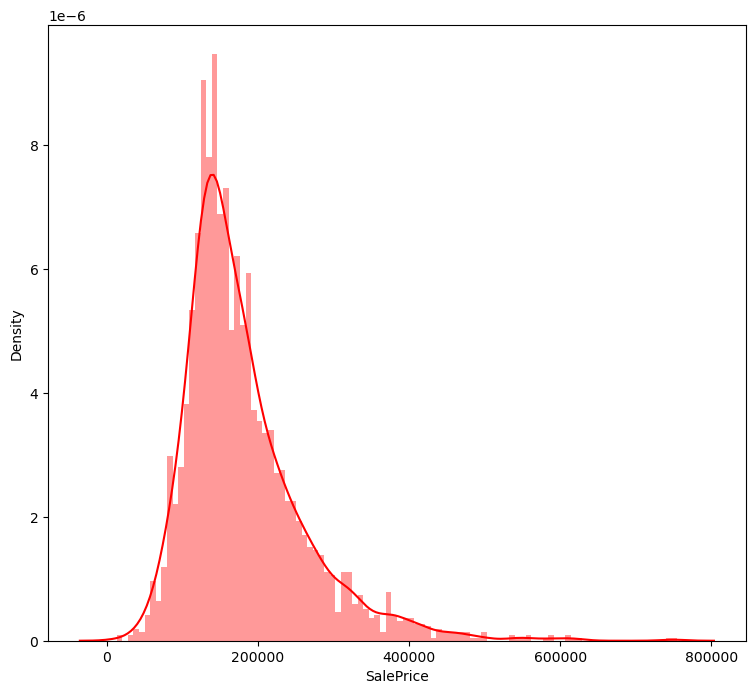

In [18]:
print(Ameshousing['SalePrice'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(Ameshousing['SalePrice'], color='r', bins=100, hist_kws={'alpha': 0.4});

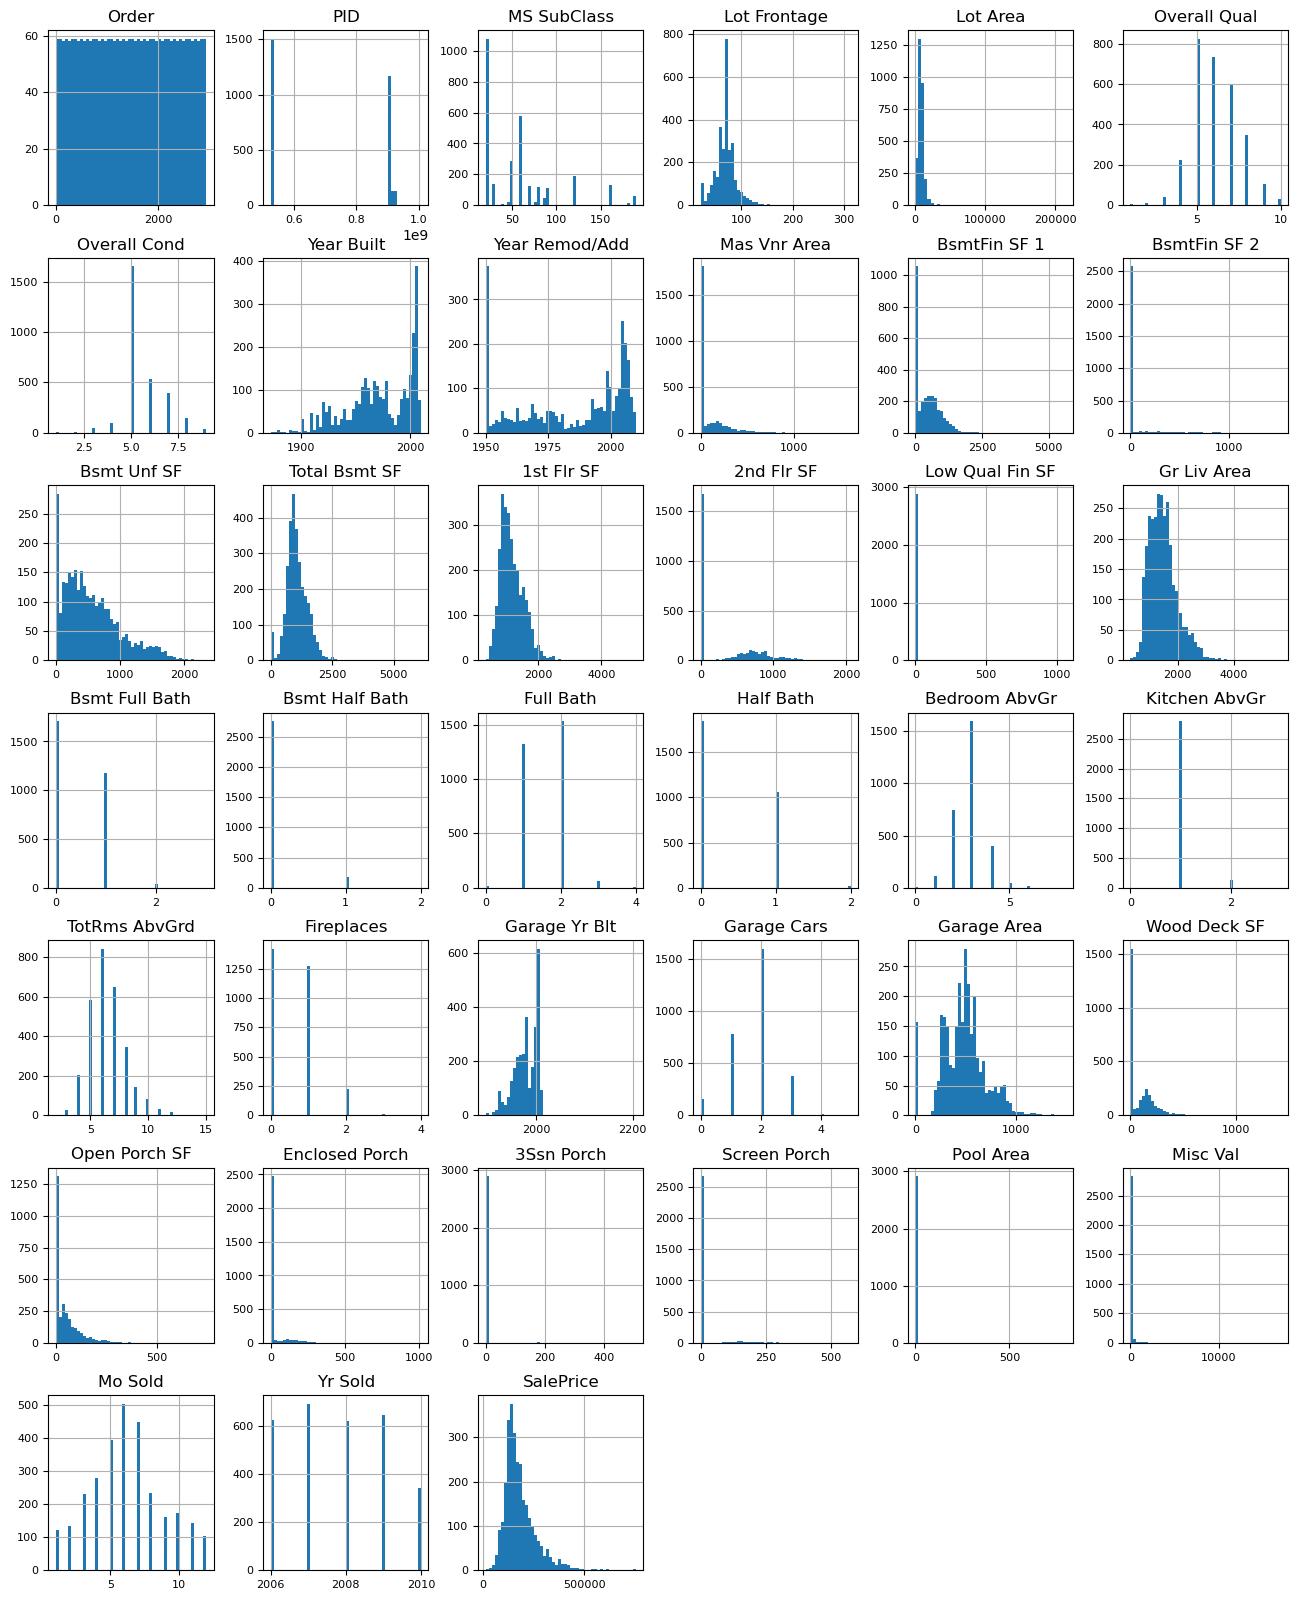

In [19]:
Ameshousing_num = Ameshousing.select_dtypes(include = ['float64', 'int64'])
Ameshousing_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);


In [26]:
# visualiztion the matrix of correlation
corr_matrix = Ameshousing.corr()

# Sort correlations with SalePrice
corr_with_saleprice = corr_matrix['SalePrice'].sort_values(ascending=False)
print(corr_with_saleprice)

SalePrice          1.000000
Overall Qual       0.799262
Gr Liv Area        0.706780
Garage Cars        0.647812
Garage Area        0.640381
Total Bsmt SF      0.632164
1st Flr SF         0.621676
Year Built         0.558426
Full Bath          0.545604
Year Remod/Add     0.532974
Garage Yr Blt      0.508882
Mas Vnr Area       0.502196
TotRms AbvGrd      0.495474
Fireplaces         0.474558
BsmtFin SF 1       0.432862
Lot Frontage       0.340256
Wood Deck SF       0.327143
Open Porch SF      0.312951
Half Bath          0.285056
Bsmt Full Bath     0.275823
2nd Flr SF         0.269373
Lot Area           0.266549
Bsmt Unf SF        0.182895
Bedroom AbvGr      0.143913
Screen Porch       0.112151
Pool Area          0.068403
Mo Sold            0.035259
3Ssn Porch         0.032225
BsmtFin SF 2       0.006018
Misc Val          -0.015691
Yr Sold           -0.030569
Order             -0.031408
Bsmt Half Bath    -0.035817
Low Qual Fin SF   -0.037660
MS SubClass       -0.085092
Overall Cond      -0

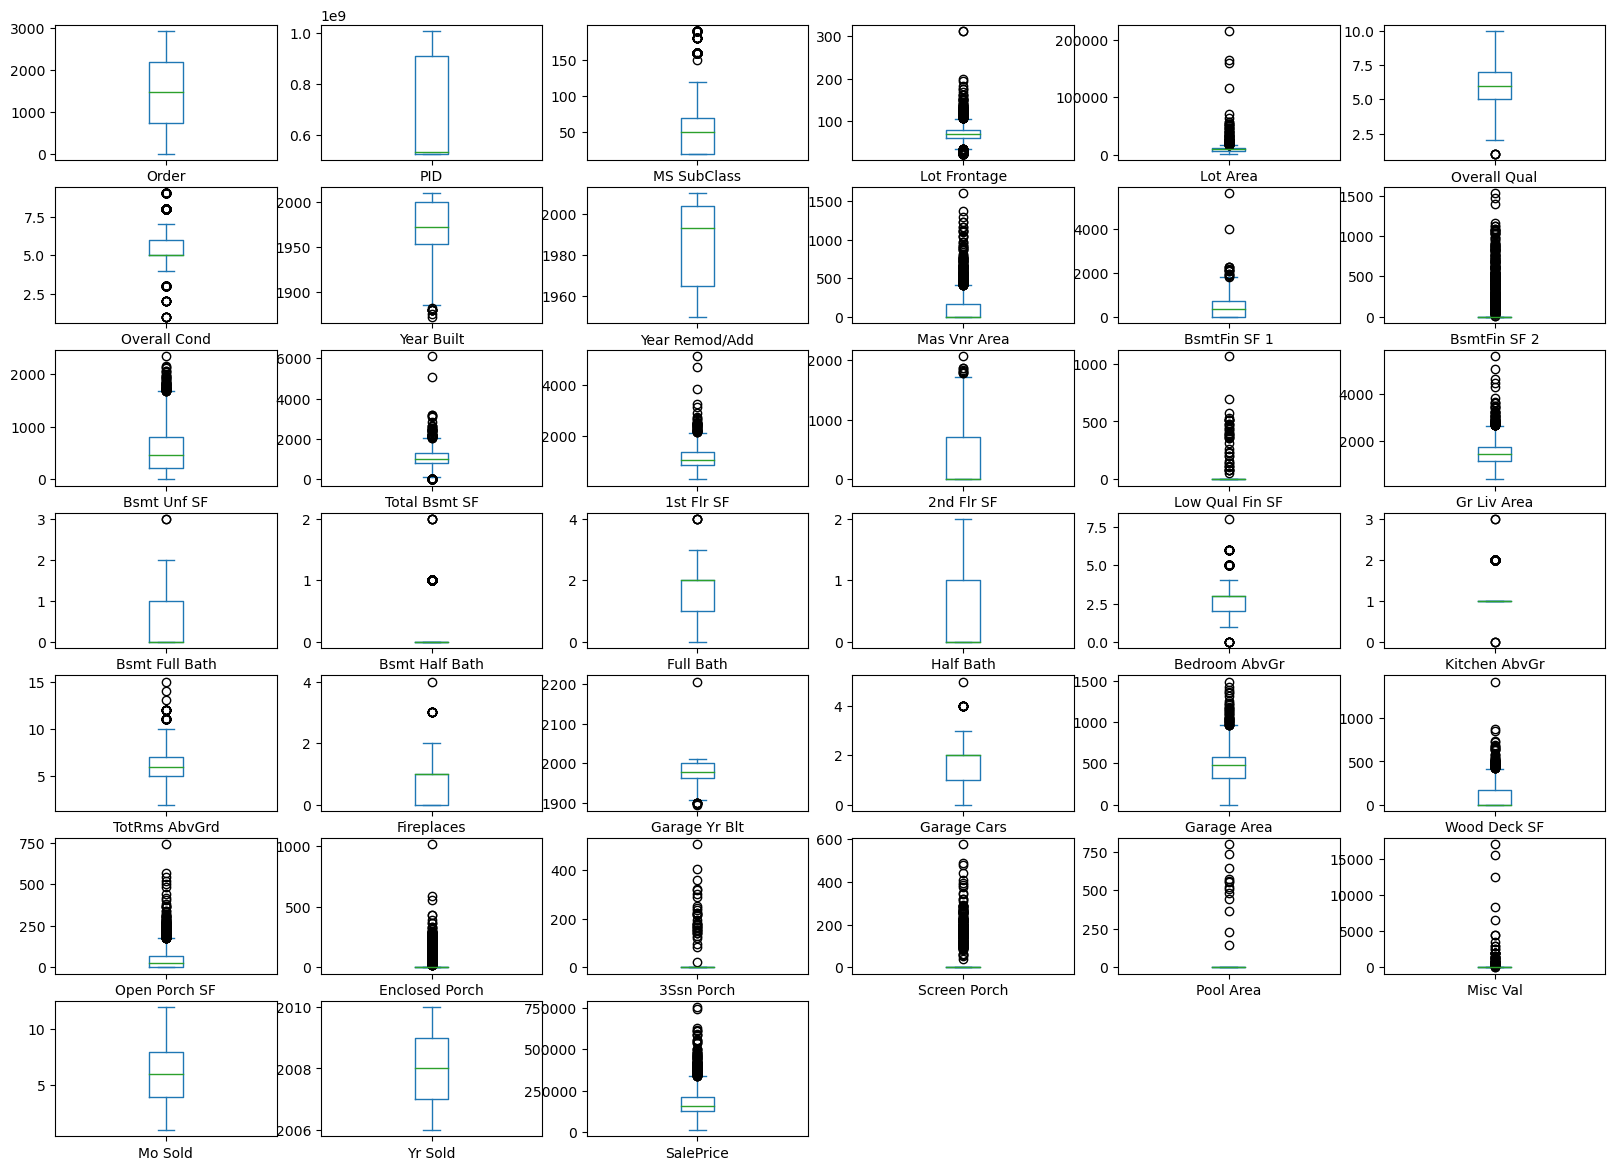

In [27]:
# visulaize the outliers in numerical columns

Ameshousing.plot(kind='box',subplots=True,layout=(12,6),figsize=(20,25))
plt.show()

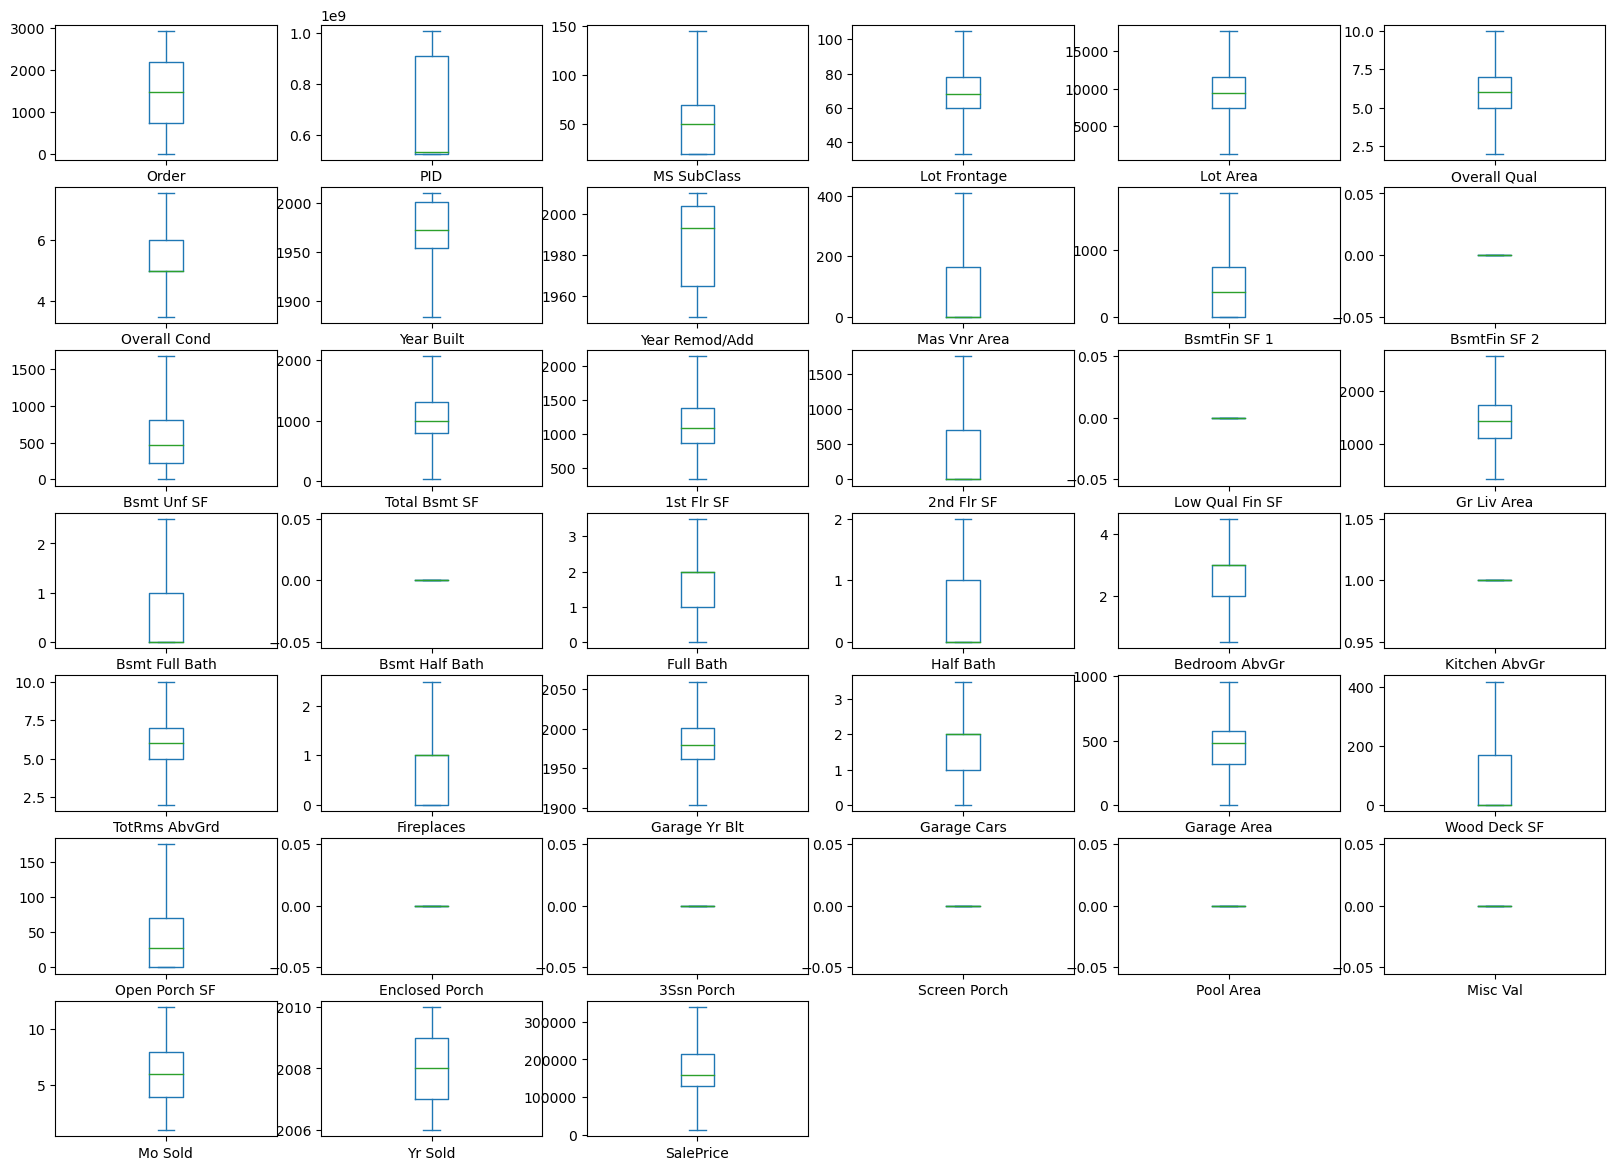

In [30]:
#most of the data have anoulire and lets update numerical and categorical columns
features = Ameshousing.columns.to_list()
numerical_columns = list(set(Ameshousing.describe().columns.to_list()) - set(['Id']))
categorical_columns = list(set(features) - set(numerical_columns) - set(['Id']))

# function of handling
def remove_outliers(Ameshousing, col, x):
    Q1 = Ameshousing[col].quantile(0.25)
    Q3 = Ameshousing[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    if x > upper_bound:
        return upper_bound
    elif x < lower_bound:
        return lower_bound
    else:
        return x

# capping outliers

for col in numerical_columns:
    Ameshousing[col] = Ameshousing[col].apply(lambda x : remove_outliers(Ameshousing, col, x))
# visualize reults 
Ameshousing.plot(kind='box',subplots=True,layout=(12,6),figsize=(20,25))
plt.show()

<Figure size 1200x500 with 0 Axes>

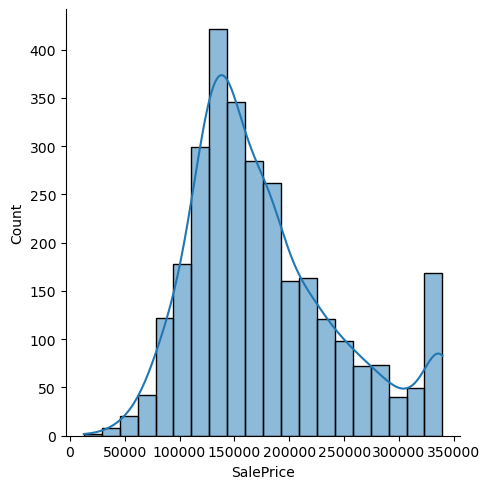

In [36]:
plt.figure(figsize=(12,5))
sns.displot(Ameshousing['SalePrice'] , bins=20 , kde=True )

<Figure size 1200x500 with 0 Axes>

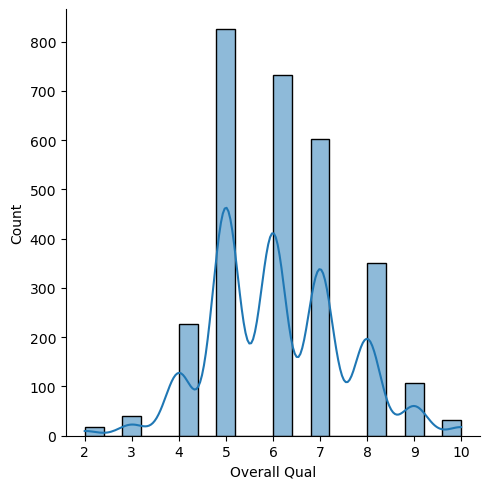

In [37]:
plt.figure(figsize=(12,5))
sns.displot(Ameshousing['Overall Qual'] , bins=20 , kde=True )

In [42]:
from sklearn.preprocessing import StandardScaler
Ameshousing['numerical_columns']=np.ceil(Ameshousing['SalePrice']/1.5)
Ameshousing['numerical_columns'].where(Ameshousing['numerical_columns']<5,5.0,inplace=True)

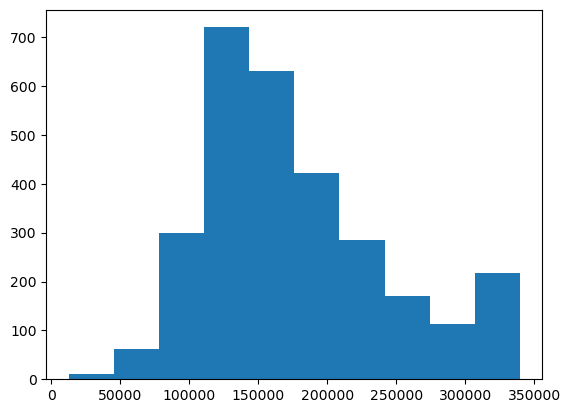

In [43]:
plt.hist(Ameshousing['SalePrice'])
fig=plt.gcf()

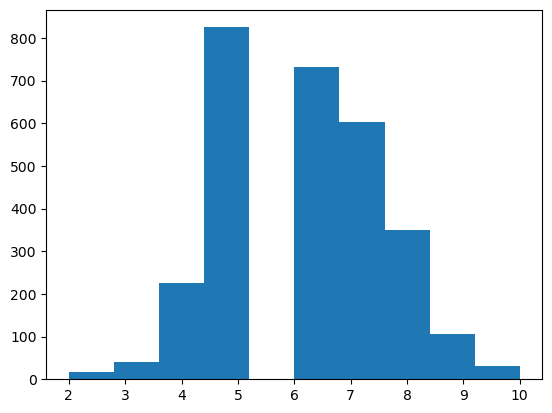

In [44]:
plt.hist(Ameshousing['Overall Qual'])
fig=plt.gcf()

In [54]:
# feature engineering
Ameshousing['HouseAge'] = Ameshousing['Yr Sold'] - Ameshousing['Year Built']
Ameshousing['FrontageRatio'] = Ameshousing['Lot Frontage'] / Ameshousing['Lot Area'] 
Ameshousing['TotalflrSF'] = Ameshousing['1st Flr SF']+Ameshousing['2nd Flr SF']+Ameshousing['Total Bsmt SF']+Ameshousing['Gr Liv Area']

In [56]:
#lets see for the coll. with sale price 
corr_matrix = Ameshousing.corr()

# Sort correlations with SalePrice
corr_with_saleprice = corr_matrix['SalePrice'].sort_values(ascending=False)
print(corr_with_saleprice)

SalePrice            1.000000
Overall Qual         0.822562
TotalflrSF           0.813047
Gr Liv Area          0.726883
Garage Cars          0.682791
Garage Area          0.668274
Total Bsmt SF        0.648421
1st Flr SF           0.633557
Year Built           0.603326
Full Bath            0.577692
Year Remod/Add       0.575350
Garage Yr Blt        0.547851
TotRms AbvGrd        0.504171
Fireplaces           0.495083
Mas Vnr Area         0.479260
BsmtFin SF 1         0.424154
Lot Area             0.410429
Open Porch SF        0.392614
Lot Frontage         0.372086
Wood Deck SF         0.346891
Half Bath            0.294733
Bsmt Full Bath       0.279228
2nd Flr SF           0.276149
Bsmt Unf SF          0.189648
Bedroom AbvGr        0.168063
Mo Sold              0.045888
Yr Sold             -0.029198
Order               -0.031671
MS SubClass         -0.055750
Overall Cond        -0.137873
FrontageRatio       -0.229533
PID                 -0.247214
HouseAge            -0.603682
BsmtFin SF

In [77]:
Ameshousing_num= Ameshousing.select_dtypes(exclude='object')
Ameshousing_obj= Ameshousing.select_dtypes(include='object')

In [78]:
Ameshousing_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 43 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Order              2930 non-null   int64  
 1   PID                2930 non-null   int64  
 2   MS SubClass        2930 non-null   float64
 3   Lot Frontage       2930 non-null   float64
 4   Lot Area           2930 non-null   float64
 5   Overall Qual       2930 non-null   float64
 6   Overall Cond       2930 non-null   float64
 7   Year Built         2930 non-null   float64
 8   Year Remod/Add     2930 non-null   int64  
 9   Mas Vnr Area       2930 non-null   float64
 10  BsmtFin SF 1       2930 non-null   float64
 11  BsmtFin SF 2       2930 non-null   float64
 12  Bsmt Unf SF        2930 non-null   float64
 13  Total Bsmt SF      2930 non-null   float64
 14  1st Flr SF         2930 non-null   float64
 15  2nd Flr SF         2930 non-null   float64
 16  Low Qual Fin SF    2930 

In [79]:
Ameshousing_obj.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 39 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   MS Zoning       2930 non-null   object
 1   Street          2930 non-null   object
 2   Lot Shape       2930 non-null   object
 3   Land Contour    2930 non-null   object
 4   Utilities       2930 non-null   object
 5   Lot Config      2930 non-null   object
 6   Land Slope      2930 non-null   object
 7   Neighborhood    2930 non-null   object
 8   Condition 1     2930 non-null   object
 9   Condition 2     2930 non-null   object
 10  Bldg Type       2930 non-null   object
 11  House Style     2930 non-null   object
 12  Roof Style      2930 non-null   object
 13  Roof Matl       2930 non-null   object
 14  Exterior 1st    2930 non-null   object
 15  Exterior 2nd    2930 non-null   object
 16  Mas Vnr Type    2930 non-null   object
 17  Exter Qual      2930 non-null   object
 18  Exter Co

In [80]:
#creating dummy
Ameshousing_obj= pd.get_dummies(Ameshousing_obj, drop_first=True)
Ameshousing_obj.shape

(2930, 214)

In [81]:
#joinging the two attributes

Ameshousing= pd.concat([Ameshousing_num, Ameshousing_obj], axis=1)
Ameshousing.head()

,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial
0,1,526301100,20.0,105.0,17727.75,6.0,5.0,1960.0,1960,112.0,...,0,0,0,0,1,0,0,0,1,0
1,2,526350040,20.0,80.0,11622.00,5.0,6.0,1961.0,1961,0.0,...,0,0,0,0,1,0,0,0,1,0
2,3,526351010,20.0,81.0,14267.00,6.0,6.0,1958.0,1958,108.0,...,0,0,0,0,1,0,0,0,1,0
3,4,526353030,20.0,93.0,11160.00,7.0,5.0,1968.0,1968,0.0,...,0,0,0,0,1,0,0,0,1,0
4,5,527105010,60.0,74.0,13830.00,5.0,5.0,1997.0,1998,0.0,...,0,0,0,0,1,0,0,0,1,0


In [57]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [82]:
num_column= Ameshousing.select_dtypes(include=['float64', 'int64'])
x = Ameshousing.drop('SalePrice', axis=1)
y = Ameshousing['SalePrice']

In [83]:
# Train-test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [93]:
model = LinearRegression()
model.fit(x_train, y_train)
y_train_predict = model.predict(x_train)
y_test_predict = model.predict(x_test)
mse_train = mean_squared_error(y_train, y_train_predict)
mse_test = mean_squared_error(y_test, y_test_predict)
r2_train = r2_score(y_train, y_train_predict)
r2_test = r2_score(y_test, y_test_predict)
pd.DataFrame(data=[mse_train,mse_test,r2_train,r2_test],index=["mse_train","mse_test","r2_train","r2_test"],columns=["LinearRegression"])

,LinearRegression
mse_train,2.838216e+08
mse_test,3.668212e+08
r2_train,9.357216e-01
r2_test,9.311665e-01


In [103]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
poly = PolynomialFeatures(degree=2)
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.transform(x_test)
model = LinearRegression()
model.fit(x_train_poly, y_train)
# Make predictions
y_train_predict = model.predict(x_train_poly)
y_test_predict = model.predict(x_test_poly)
mse_train1 = mean_squared_error(y_train, y_train_predict)
mse_test1 = mean_squared_error(y_test, y_test_predict)
r2_train1 = r2_score(y_train, y_train_predict)
r2_test1 = r2_score(y_test, y_test_predict)
pd.DataFrame(data=[mse_train1,mse_test1,r2_train1,r2_test1],index=["mse_train1","mse_test1","r2_train1","r2_test1"],columns=["PolynomialFeature"])

,PolynomialFeature
mse_train1,1.067690e+08
mse_test1,5.980801e+08
r2_train1,9.758195e-01
r2_test1,8.877712e-01


In [112]:
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(x_train, y_train)
# Predictions
y_train_predict_rf = rf.predict(x_train)
y_test_predict_rf = rf.predict(x_test)
mse_train2 = mean_squared_error(y_train, y_train_predict_rf )
mse_test2 = mean_squared_error(y_test, y_test_predict_rf)
r2_train2 = r2_score(y_train, y_train_predict_rf)
r2_test2 = r2_score(y_test, y_test_predict_rf)
pd.DataFrame(data=[mse_train2,mse_test2,r2_train2,r2_test2],index=["mse_train2","mse_test2","r2_train2","r2_test2"],columns=["RandomForestRegressor"])

,RandomForestRegressor
mse_train2,6.343135e+07
mse_test2,3.329668e+08
r2_train2,9.856344e-01
r2_test2,9.375193e-01


In [113]:
# Gradient Boosting Regressor
gbr = GradientBoostingRegressor(n_estimators=100, random_state=42)
gbr.fit(x_train, y_train)

# Predictions
y_train_predict_gbr = gbr.predict(x_train)
y_test_predict_gbr = gbr.predict(x_test)
mse_train3 = mean_squared_error(y_train, y_train_predict_gbr )
mse_test3 = mean_squared_error(y_test, y_test_predict_gbr)
r2_train3 = r2_score(y_train, y_train_predict_gbr)
r2_test3 = r2_score(y_test, y_test_predict_gbr)
pd.DataFrame(data=[mse_train3,mse_test2,r2_train3,r2_test3],index=["mse_train3","mse_test3","r2_train3","r2_test3"],columns=["GradientBoostingRegressor"])

,GradientBoostingRegressor
mse_train3,2.004768e+08
mse_test3,3.329668e+08
r2_train3,9.545971e-01
r2_test3,9.467800e-01


In [118]:
#lets compare 
data={'LinearRegression':[mse_train,mse_test,r2_train,r2_test],"PolynomialFeature":[mse_train1,mse_test1,r2_train1,r2_test1],"RandomForestRegressor":[mse_train2,mse_test2,r2_train2,r2_test2],"GradientBoostingRegressor":[mse_train3,mse_test2,r2_train3,r2_test3]}
pd.DataFrame(data,index=['mse_train','mse_test','r2_train','r2_test'])

,LinearRegression,PolynomialFeature,RandomForestRegressor,GradientBoostingRegressor
mse_train,1.067690e+08,1.067690e+08,6.343135e+07,2.004768e+08
mse_test,5.980801e+08,5.980801e+08,3.329668e+08,3.329668e+08
r2_train,9.758195e-01,9.758195e-01,9.856344e-01,9.545971e-01
r2_test,8.877712e-01,8.877712e-01,9.375193e-01,9.467800e-01


In [ ]:
#for this data RandomForestRegressor is performing good!